In [12]:
import os
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
#from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import MMV_Tools as mmv
%matplotlib inline 
#inline_rc = dict(plt.rcParams)
plt.rcParams.update(plt.rcParams)

#Now set some default parameters. 
plt.rcParams["figure.figsize"] = (15,8) #in inches
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['legend.fontsize']=10
plt.rcParams['lines.linewidth']=2

In [13]:
os.listdir()

['Term Project MMV Checklist.pdf',
 'FINAL_PROJECT.py',
 'crude_oil.csv',
 'backup_tootls.py',
 '~$NALREPORT.docx',
 '.DS_Store',
 'forecast_data.csv',
 'Multivariate Modeling Term Project Sources and References.docx',
 'tesssts.py',
 'unemployment_rt.csv',
 'MMV_Tools.py',
 '__pycache__',
 '~$FinalPresentation.pptx',
 'FINALREPORT copy.docx',
 'FINAL_PROJECT-Copy2.ipynb',
 'HW5.ipynb',
 'FINAL_PROJECT.ipynb',
 'FINALREPORT.docx',
 'HW5-Copy1.ipynb',
 '.ipynb_checkpoints',
 'FINAL_PROJECT-Copy3.ipynb',
 'FINAL_PROJECT-Copy1.ipynb',
 'backup',
 '~$NALREPORT copy.docx',
 'FinalPresentation.pptx',
 'forecast_carsales.csv',
 'total_auto_sale.csv']

In [14]:
data = pd.read_csv('forecast_carsales.csv')
df = data.copy()
df.reset_index(level = 0, inplace=True)
df.set_index('DATE', inplace=True)
df= df.drop(["index"],axis = 1)

In [15]:
df.index = pd.to_datetime(df.index)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529 entries, 1976-01-01 to 2020-01-01
Data columns (total 8 columns):
Sales        529 non-null float64
CPI_all      529 non-null float64
CPI_lfe      529 non-null float64
CPI_NewV     529 non-null float64
CPI_UsedV    529 non-null float64
CapUtil      529 non-null float64
PayrollNF    529 non-null int64
UnempRT      529 non-null float64
dtypes: float64(7), int64(1)
memory usage: 37.2 KB


In [17]:
df.head(529)

,Sales,CPI_all,CPI_lfe,CPI_NewV,CPI_UsedV,CapUtil,PayrollNF,UnempRT
DATE,,,,,,,,
1976-01-01,12.814,55.800,55.900,65.500,45.100,75.8112,78503,7.9
1976-02-01,13.340,55.900,56.200,65.800,45.800,80.8298,78816,7.7
1976-03-01,13.378,56.000,56.500,66.100,47.300,80.6025,79048,7.6
1976-04-01,13.223,56.100,56.700,66.300,48.800,82.3248,79292,7.7
1976-05-01,12.962,56.400,57.000,66.400,49.800,82.1777,79312,7.4
...,...,...,...,...,...,...,...,...
2019-09-01,17.723,256.593,264.682,146.858,141.983,74.7284,151368,3.5
2019-10-01,17.046,257.229,264.987,146.776,140.254,68.3003,151553,3.6
2019-11-01,17.447,257.824,265.501,146.558,139.310,84.9668,151814,3.5


In [8]:
sales = df.Sales

In [19]:
sales.[3]

TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [3] of <class 'int'>

/Users/nando/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


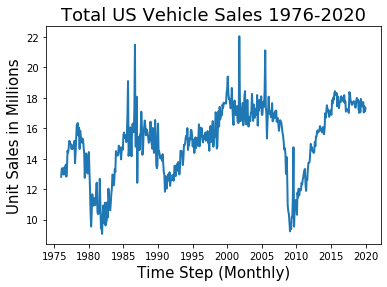

In [7]:
# 3
# Describe the dataset
# a.
# Plot Dependent(Sales) with time
plt.plot(df.Sales)
plt.xlabel('Time Step (Monthly)', fontsize=15)
plt.ylabel('Unit Sales in Millions', fontsize=15)
plt.title('Total US Vehicle Sales 1976-2020',fontsize=18)
plt.show()

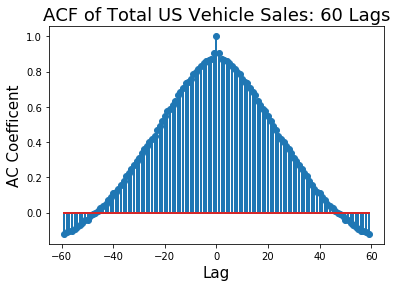

In [8]:
mmv.acf_plot(mmv.ACF(df.Sales,60),"Total US Vehicle Sales: 60 Lags")

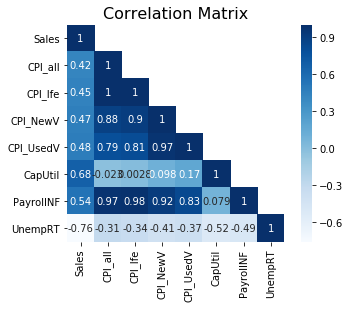

In [9]:
mmv.corrmat(df)

In [10]:
# e
# Data is clean with no missing data values
df.isnull().sum()

Sales        0
CPI_all      0
CPI_lfe      0
CPI_NewV     0
CPI_UsedV    0
CapUtil      0
PayrollNF    0
UnempRT      0
dtype: int64

In [11]:
# f
# Split data into training and testing
# Create training and testing sets

train, test = train_test_split(df, test_size = 0.2, shuffle=False)

In [12]:
# 4
# Stationarity
# Check inital stationarity
mmv.ADF_Cal(df.Sales)

ADF Statistic: -2.050952
p-value: 0.264689
Critical Values:
	1%: -3.442891
	5%: -2.867072
	10%: -2.569716


In [13]:
# Create first order difference of Sales
mmv.ADF_Cal(np.diff(df.Sales))

ADF Statistic: -16.818233
p-value: 0.000000
Critical Values:
	1%: -3.442891
	5%: -2.867072
	10%: -2.569716


Text(0.5, 1.0, 'First Order Differencing of Total Vehicle Sales')

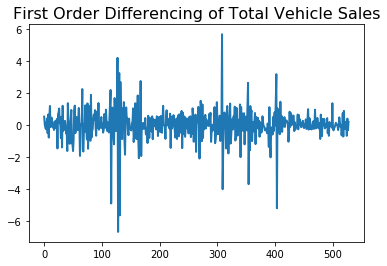

In [14]:
plt.plot(np.diff(df.Sales))
plt.title("First Order Differencing of Total Vehicle Sales")

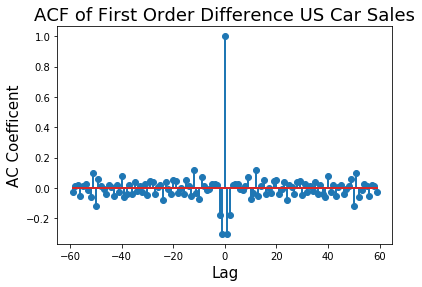

In [15]:
mmv.acf_plot(mmv.ACF(np.diff(df.Sales),60),"First Order Difference US Car Sales")

In [16]:
ytrain = train[["Sales"]]
ytest = test[["Sales"]]

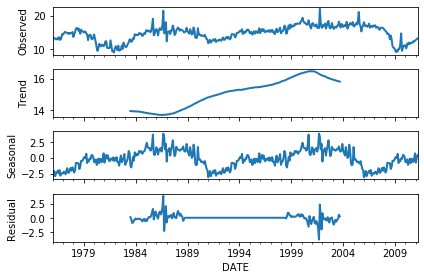

In [17]:
# Review the differences between additive and multiplicative models
result = seasonal_decompose(ytrain, model ='additive',freq = 180)
result.plot()
plt.show()

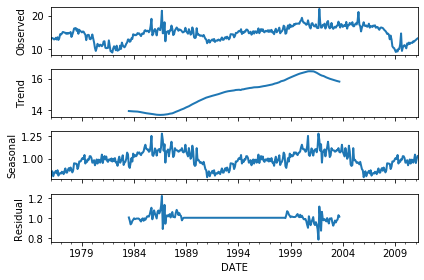

In [18]:
result = seasonal_decompose(ytrain, model ='multiplicative',freq = 180)
result.plot()
plt.show()

In [19]:
ytrain = train[["Sales"]]
ytest = test[["Sales"]]

SSE of Residuals:
387.1077582705085
SSE of Forecast Errors:
1682.2819918142657
Mean Forecast Error:
3.678241298955054
MSE:
15.870584828436467
Variance of Forecast Error:
2.363422211051213


/Users/nando/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


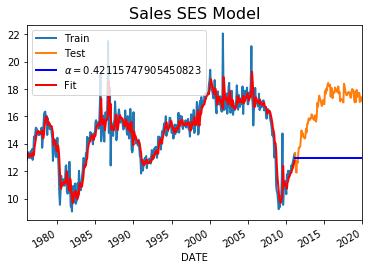

In [21]:
mmv.SES(ytrain,ytest,"Sales")

Residual SSE:
1 291.33227243615244
2 191.9094051889881
3 327.2988116171225
4 nan
Forecast SSE:
1 275.9598929620879
2 211.65080520446298
3 42996.857875444584
4 0.0
          M1:Add_Add  M2:Add_Mul  M3:Mul_Add  M4:Mul_Mul
$\alpha$    0.421053    0.450925    0.315789    0.140351
$\beta$     0.036410    0.028147    0.103935    0.052632
$\phi$      0.618973    0.934514    0.987382    0.666667
$\gamma$    0.578947    0.000000    0.684211    0.192982
$l_0$      64.562377   62.458109   62.933188   62.759851
$b_0$       0.882803    0.993148    1.001452    1.501308
SSE       291.332272  191.909405  327.298812         NaN


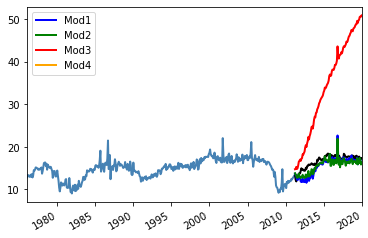

In [22]:
mmv.holtwinters_modelselect(ytrain,ytest,181)

Residual SSE:
191.9094051889881
Forecast SSE:
211.65080520446298
MSE:
1.9967057094760665
Variance:
0.8525499266937389


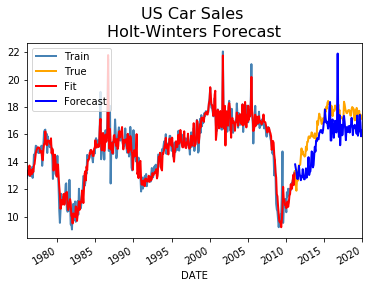

In [23]:
pred = mmv.holtwinters(ytrain,ytest,181,"add","mul")

In [24]:
# Best to use the first order of Sales

In [25]:
# 5
# Feature selection
# Correlation coefficents

In [26]:
# Multicolinearity
fs = df[["Sales","CPI_UsedV","CapUtil","PayrollNF","UnempRT"]]
fs = fs.copy()
corr_matrix1= fs.corr()
corr_matrix1.style.background_gradient().set_precision(2)

,Sales,CPI_UsedV,CapUtil,PayrollNF,UnempRT
Sales,1,0.48,0.68,0.54,-0.76
CPI_UsedV,0.48,1,0.17,0.83,-0.37
CapUtil,0.68,0.17,1,0.079,-0.52
PayrollNF,0.54,0.83,0.079,1,-0.49
UnempRT,-0.76,-0.37,-0.52,-0.49,1


In [27]:
# The only PC to not pass the t-test was Sales-CPI with Payroll controlled
# This makes sense since there is multicolinearity betweent the two
# Will see what OLS regression results show


OLS Linear Regression:
Data Shapes:
(423, 5)
(423, 1)
(106, 5)
(106, 1)

Beta Coefficents: 

B0:  8.26776676088036
B1:  0.00011994237534203398
B2:  0.08484942445844634
B3:  3.1124967214496505e-05
B4:  -0.5441144883537967

K = # Independent Vars: 4

Fitted Model Resuults:
Number of Obs: 423
Mean Error: -2.4547319784941426e-13
MAE: 0.8766435284655005
MSE: 1.4254021695432055
RMSE: 1.1939020770327882
SSE: 602.9451177167759
Standard Error: 1.201021413101835
Variance Error: 1.4254021695432053
Diagnostics:


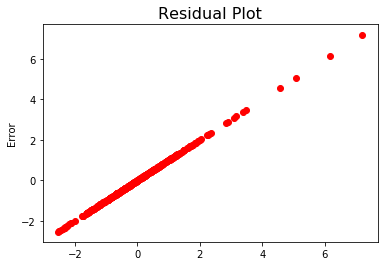

Correlation of Residuals with Fitted Tartget: -3.293567312931283e-14


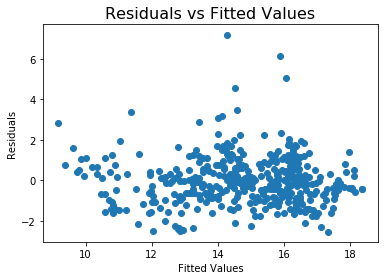

Q: 2536.542694170171
2536.542694170171  >  489.26948763943386
Residuals are not white


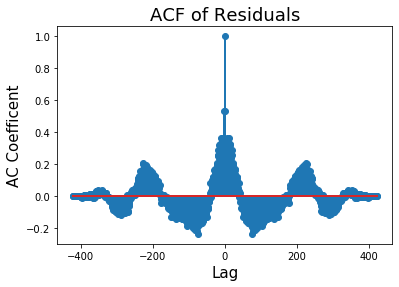

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     275.8
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          8.78e-116
Time:                        15:36:28   Log-Likelihood:                -675.18
No. Observations:                 423   AIC:                             1360.
Df Residuals:                     418   BIC:                             1381.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2678      1.080      7.653      0.0

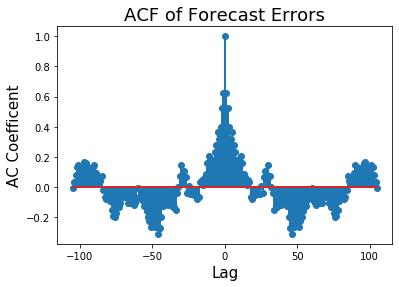

In [28]:
yhat, yfit, ytrain, ytest, sef= mmv.linreg(fs,"Sales")

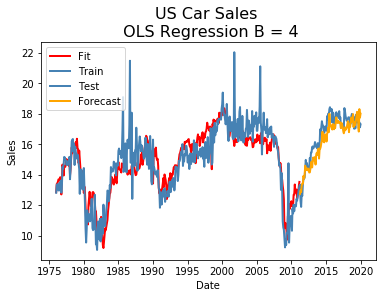

In [30]:
plt.plot(df.index[:423],yfit, color = "red", label = "Fit")
plt.plot(df.index[:423],ytrain, color = "steelblue", label = "Train")
plt.plot(df.index[423:],ytest, color = "steelblue", label = "Test")
plt.plot(df.index[423:],yhat, color = "orange", label = "Forecast")
plt.title("US Car Sales \n OLS Regression B = 4")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show();

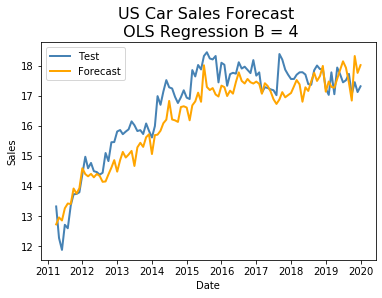

In [31]:
plt.plot(df.index[423:],ytest, color = "steelblue", label = "Test")
plt.plot(df.index[423:],yhat, color = "orange", label = "Forecast")
plt.title("US Car Sales Forecast \n OLS Regression B = 4")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show();

In [32]:
fs1 = fs[["CapUtil","PayrollNF","UnempRT","Sales"]]


OLS Linear Regression:
Data Shapes:
(423, 4)
(423, 1)
(106, 4)
(106, 1)

Beta Coefficents: 

B0:  8.253710174580371
B1:  0.08491042389637658
B2:  3.132099630775768e-05
B3:  -0.5438409512209628

K = # Independent Vars: 3

Fitted Model Resuults:
Number of Obs: 423
Mean Error: 3.608314067816244e-13
MAE: 0.8765037884007569
MSE: 1.425405520172275
RMSE: 1.1939034802580462
SSE: 602.9465350328724
Standard Error: 1.1995887670790857
Variance Error: 1.4254055201722753
Diagnostics:


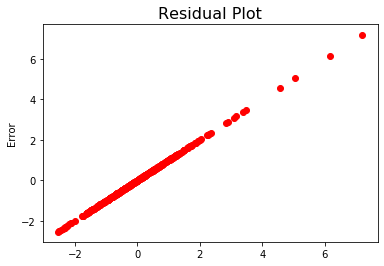

Correlation of Residuals with Fitted Tartget: 3.2282739745723575e-14


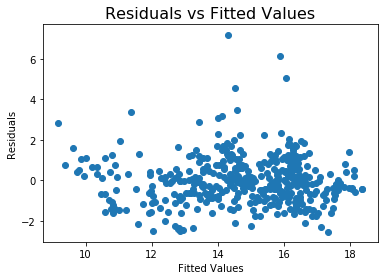

Q: 2537.168444541492
2537.168444541492  >  490.34982191040376
Residuals are not white


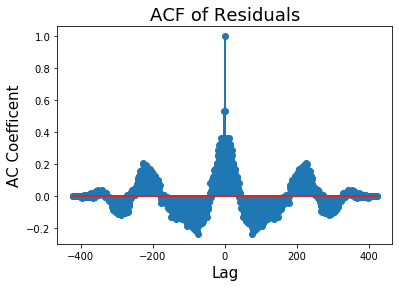

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     368.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          4.21e-117
Time:                        15:37:17   Log-Likelihood:                -675.18
No. Observations:                 423   AIC:                             1358.
Df Residuals:                     419   BIC:                             1375.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2537      0.982      8.407      0.0

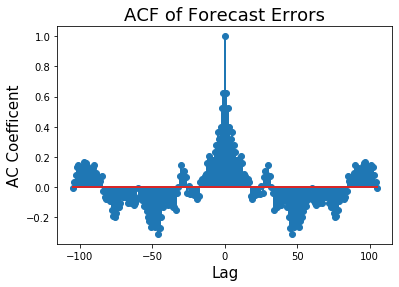

In [33]:
yhat, yfit, ytrain, ytest, sef= mmv.linreg(fs1,"Sales")

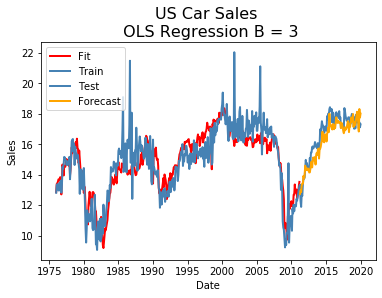

In [34]:
plt.plot(df.index[:423],yfit, color = "red", label = "Fit")
plt.plot(df.index[:423],ytrain, color = "steelblue", label = "Train")
plt.plot(df.index[423:],ytest, color = "steelblue", label = "Test")
plt.plot(df.index[423:],yhat, color = "orange", label = "Forecast")
plt.title("US Car Sales \n OLS Regression B = 3")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show();

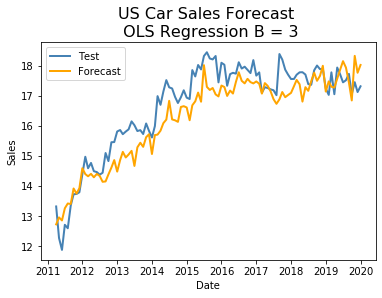

In [35]:
plt.plot(df.index[423:],ytest, color = "steelblue", label = "Test")
plt.plot(df.index[423:],yhat, color = "orange", label = "Forecast")
plt.title("US Car Sales Forecast \n OLS Regression B = 3")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show();

In [36]:
# LM Parameter Estimation

In [38]:
# perform first orde difference on data to feed into GPAC
sales = df[["Sales"]]

In [39]:
sales["Diff"] = np.array(list(np.diff(df.Sales))+ [0])

In [40]:
sdiff = sales[["Diff"]]

sdtrain = sdiff[:423]
sdtest = sdiff[423:]

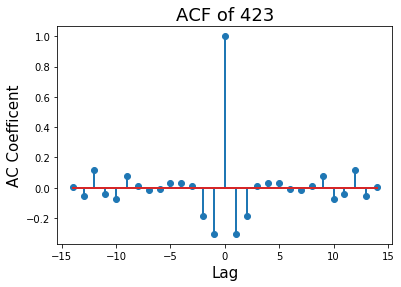

          1         2         3         4         5         6         7  \
0 -0.305140 -0.307754 -0.187755 -0.113760 -0.035984 -0.019136 -0.013782   
1  0.609517 -0.139225 -0.007863 -0.055139  0.024434  0.006771 -0.021465   
2 -0.075167 -0.158074  0.927613 -0.056934  0.050089  0.111638 -0.065977   
3  2.287163 -0.098355 -0.226737 -0.083507 -0.083143  0.000000  0.000000   
4  0.935668 -2.090301 -0.181659 -0.188873  0.000000  0.000000  0.000000   
5 -0.384426 -0.443466  0.250428  0.000000  0.000000  0.000000  0.000000   
6  1.243111 -0.614497  3.766207  0.000000  0.000000  0.000000  0.000000   
7 -0.849693 -3.552893 -1.565159  0.000000  0.000000  0.000000  0.000000   

          8  
0  0.005534  
1  0.253144  
2 -0.122734  
3 -0.198513  
4  0.000000  
5  0.000000  
6  0.000000  
7  0.000000  


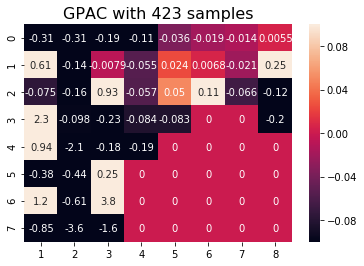

,1,2,3,4,5,6,7,8
0,-0.305140,-0.307754,-0.187755,-0.113760,-0.035984,-0.019136,-0.013782,0.005534
1,0.609517,-0.139225,-0.007863,-0.055139,0.024434,0.006771,-0.021465,0.253144
2,-0.075167,-0.158074,0.927613,-0.056934,0.050089,0.111638,-0.065977,-0.122734
3,2.287163,-0.098355,-0.226737,-0.083507,-0.083143,0.000000,0.000000,-0.198513
4,0.935668,-2.090301,-0.181659,-0.188873,0.000000,0.000000,0.000000,0.000000
5,-0.384426,-0.443466,0.250428,0.000000,0.000000,0.000000,0.000000,0.000000
6,1.243111,-0.614497,3.766207,0.000000,0.000000,0.000000,0.000000,0.000000
7,-0.849693,-3.552893,-1.565159,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
mmv.GPAC(sdtrain,len(sdtrain))

In [ ]:
# LOOKS like an ARMA(4,3)


Estimated Results:

Total # of Iterations: 11
Mean Error: 0.0031482397463651686
True Theta:
[['a1' '0']
 ['a2' '0']
 ['a3' '0']
 ['a4' '0']
 ['b1' '0']
 ['b2' '0']
 ['b3' '0']]
Estimated Theta:
[['a1' '-0.22319452130689943']
 ['a2' '-1.1377166266350607']
 ['a3' '0.3469160200649192']
 ['a4' '0.23208367451606415']
 ['b1' '0.2617361266176082']
 ['b2' '-0.798617471801991']
 ['b3' '-0.049269284605489586']]
95% Confidence Interval:
[['Theta' ' Theta - 2xSTD ' ' Theta  + 2xSTD  ']
 ['a1' '-0.6995342207819601' '0.2531451781681613']
 ['a2' '-1.4748579252621576' '-0.8005753280079638']
 ['a3' '-0.1160122584199263' '0.8098442985497647']
 ['a4' '-0.05679789443293026' '0.5209652434650586']
 ['b1' '-0.227470090656972' '0.7509423438921884']
 ['b2' '-1.1019833732056352' '-0.4952515703983469']
 ['b3' '-0.5399049212827932' '0.44136635207181407']]
Covariance Matrix of Theta:
[['a1' '0.05672487732399779' '-0.02080545722947427'
  '-0.05302035018938755' '0.02679089191954751' '0.05704945052074018'
  '0.01119

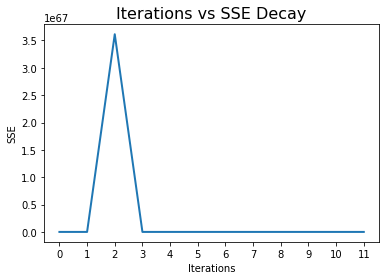

Relevant Parameters:
[['a2' '-1.1377166266350607']
 ['b2' '-0.798617471801991']]
MA/Num parameters: [1, -0.798617471801991]
AR/Den parameters: [1, -1.1377166266350607]


In [43]:
num = [1,0,0,0]
den = [1,0,0,0,0]
nume, dene, e, var_e, cov_theta = mmv.LM(sdtrain,num,den)


Estimated Results:

Total # of Iterations: 13
Mean Error: 0.0040230948489391105
True Theta:
[['a1' '0']
 ['a2' '0']
 ['a3' '0']
 ['a4' '0']
 ['b1' '0']
 ['b2' '0']]
Estimated Theta:
[['a1' '-0.3435939454504957']
 ['a2' '-1.1399902620694766']
 ['a3' '0.4435783867305228']
 ['a4' '0.20604172272250343']
 ['b1' '0.117583623194714']
 ['b2' '-0.8344068736786691']]
95% Confidence Interval:
[['Theta' ' Theta - 2xSTD ' ' Theta  + 2xSTD  ']
 ['a1' '-0.5471708502125752' '-0.1400170406884162']
 ['a2' '-1.2539109511483408' '-1.0260695729906124']
 ['a3' '0.30182932819922165' '0.585327445261824']
 ['a4' '0.10312353674504136' '0.3089599086999655']
 ['b1' '-0.07138647485592131' '0.3065537212453493']
 ['b2' '-1.015293565848022' '-0.6535201815093161']]
Covariance Matrix of Theta:
[['a1' '0.0103608890381272' '0.001541342847122945'
  '-0.006905346912501642' '0.0022252032350806614' '0.008479130246775619'
  '0.0078274192546477']
 ['a2' '0.0015413428471216257' '0.0032444808500508107'
  '-0.0003301749547090585

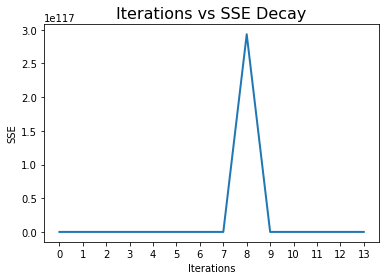

Relevant Parameters:
[['a1' '-0.3435939454504957']
 ['a2' '-1.1399902620694766']
 ['a3' '0.4435783867305228']
 ['a4' '0.20604172272250343']
 ['b2' '-0.8344068736786691']]
MA/Num parameters: [1, -0.8344068736786691]
AR/Den parameters: [1, -0.3435939454504957, -1.1399902620694766, 0.4435783867305228, 0.20604172272250343]


In [44]:
# only 2 parameters passed CI
# Try another combination (4,2)
num = [1,0,0]
den = [1,0,0,0,0]
nume, dene, e, var_e, cov_theta = mmv.LM(sdtrain,num,den)

In [ ]:
# not all paramters passed, try another combination

In [ ]:
# Relook at GPAC and see if there is another possible ORDER

SSE = NAN nan
SSE = INF inf

Estimated Results:

Total # of Iterations: 15
Mean Error: 0.0015543612883854138
True Theta:
[['a1' '0']
 ['a2' '0']
 ['a3' '0']
 ['b1' '0']]
Estimated Theta:
[['a1' '0.5424807292530607']
 ['a2' '-0.6182738516581985']
 ['a3' '-0.14184911993146673']
 ['b1' '0.9835609219158081']]
95% Confidence Interval:
[['Theta' ' Theta - 2xSTD ' ' Theta  + 2xSTD  ']
 ['a1' '0.4431529713861847' '0.6418084871199367']
 ['a2' '-0.7109645337249277' '-0.5255831695914692']
 ['a3' '-0.24271882111845328' '-0.040979418744480176']
 ['b1' '0.9592915339479757' '1.0078303098836405']]
Covariance Matrix of Theta:
[['a1' '0.0024665008707151857' '0.00109091745098316'
  '-0.001432393255616125' '0.00013315908613439876']
 ['a2' '0.0010909174509845505' '0.002147890635498873'
  '0.00105485961500113' '2.7269874624668803e-06']
 ['a3' '-0.0014323932556147155' '0.0010548596150025608'
  '0.0025436741543879895' '-0.0001329010485192017']
 ['b1' '0.0001331590861343564' '2.7269874623730904e-06'
  '-0.0001

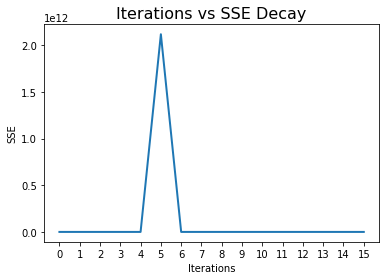

Relevant Parameters:
[['a1' '0.5424807292530607']
 ['a2' '-0.6182738516581985']
 ['a3' '-0.14184911993146673']
 ['b1' '0.9835609219158081']]
MA/Num parameters: [1, 0.9835609219158081]
AR/Den parameters: [1, 0.5424807292530607, -0.6182738516581985, -0.14184911993146673]


In [45]:
num = [1,0]
den = [1,0,0,0]
nume, dene, e, var_e, cov_theta = mmv.LM(sdtrain,num,den)


Predictions Based on STATS MODELS Results
                              ARMA Model Results                              
Dep. Variable:                   Diff   No. Observations:                  423
Model:                     ARMA(1, 1)   Log Likelihood                -578.461
Method:                       css-mle   S.D. of innovations              0.949
Date:                Sun, 19 Apr 2020   AIC                           1164.922
Time:                        15:55:13   BIC                           1181.111
Sample:                    01-01-1976   HQIC                          1171.319
                         - 03-01-2011                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.018     -0.009      0.993      -0.036       0.036
ar.L1.Diff     0.1816      0.071      2.560      0.011       0.043       0.321
ma.L1.Dif

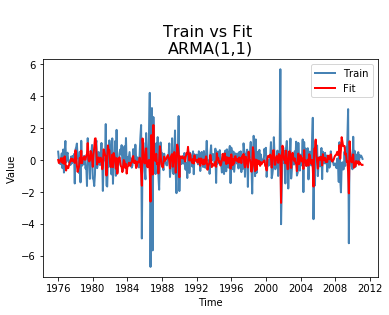

Residual Error Stats:
ME:
0.0011389496802026923
SSE:
381.3759212868617
MSE:
0.9015979226639756
RMSE:
0.033748328554206834
Variance of Error:
0.9015966254576019


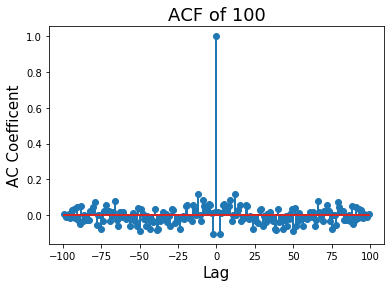

Q: 72.99547356733599  <  CHI Critcal: 491.430060551799
Residuals are white

Forecast Errors:
ME:
0.058795107609168736
SSE:
38.52982952886994
MSE:
0.3634889578195277
RMSE:
0.2424770249099257
Variance of Error:
0.36003209314075396


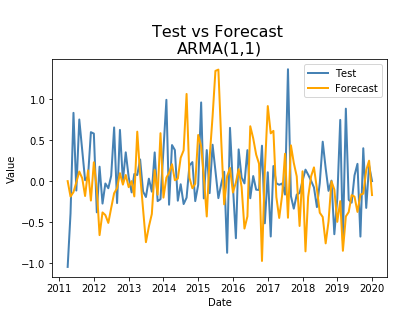


END


In [48]:
yfit11, yhat11,na11,nb11 = mmv.estARMA(sdtrain,"Diff",sdtest,1,1,0,len(sdtrain)-1,0.01)

Residual Error Stats:
ME:
-0.8954167665600957
SSE:
1058.2971105923634
MSE:
2.501884422204169
RMSE:
nan
Variance of Error:
1.700113236367232


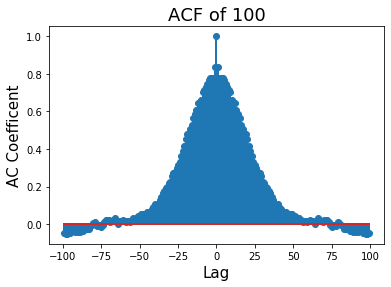

4252.127471723049  >  605.4533587213034
Residuals are not white

Try a Different Order


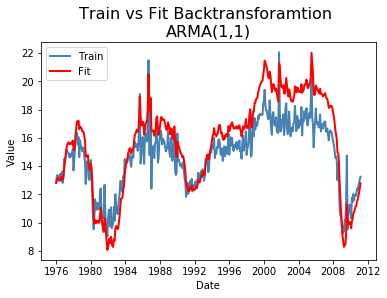

ME:
3.382177943070796
SSE:
2633.520677161244
MSE:
24.844534690200412
RMSE:
1.8390698581268727
Variance of Error:
13.405407051605811


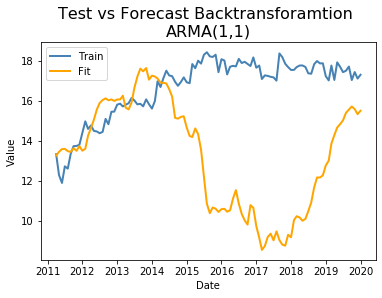

In [49]:
mmv.backtrans(sales,yfit11,yhat11,ytrain,ytest,na11,nb11)

In [ ]:
# Look at different model


Predictions Based on STATS MODELS Results
                              ARMA Model Results                              
Dep. Variable:                   Diff   No. Observations:                  423
Model:                     ARMA(1, 3)   Log Likelihood                -572.319
Method:                       css-mle   S.D. of innovations              0.936
Date:                Sun, 19 Apr 2020   AIC                           1156.638
Time:                        16:15:04   BIC                           1180.922
Sample:                    01-01-1976   HQIC                          1166.234
                         - 03-01-2011                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.026      0.095      0.924      -0.049       0.053
ar.L1.Diff     0.8533      0.087      9.763      0.000       0.682       1.025
ma.L1.Dif

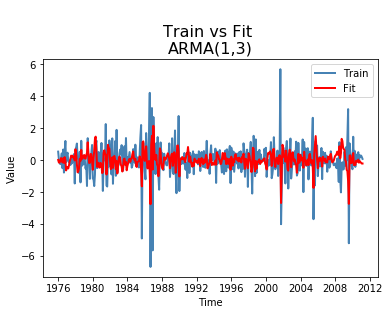

Residual Error Stats:
ME:
-0.0007707285079137913
SSE:
370.3116850810498
MSE:
0.8754413358890066
RMSE:
nan
Variance of Error:
0.8754407418665736


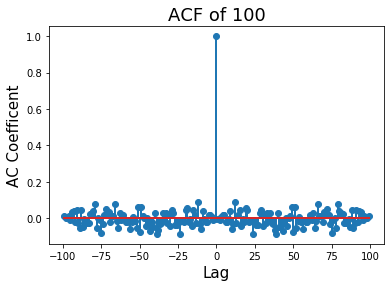

Q: 59.842635469365355  <  CHI Critcal: 489.26948763943386
Residuals are white

Forecast Errors:
ME:
0.047150905089754516
SSE:
40.30772475764565
MSE:
0.3802615543174118
RMSE:
0.21714259160688518
Variance of Error:
0.3780383464666288


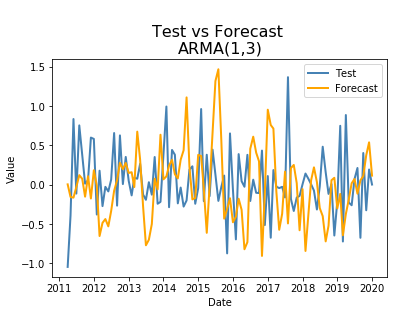


END


In [52]:
yfit13,yhat13,na13,nb13 = mmv.estARMA(sdtrain,"Diff",sdtest,1,3,0,len(sdtrain)-1,0.01)

Residual Error Stats:
ME:
1.5329627897938094
SSE:
1618.3235008671352
MSE:
3.825823879118523
RMSE:
1.2381287452417093
Variance of Error:
1.4758489642261035


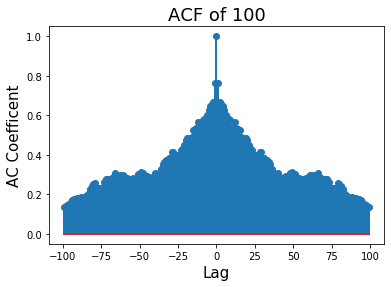

5546.9100114149205  >  603.3098821077629
Residuals are not white

Try a Different Order


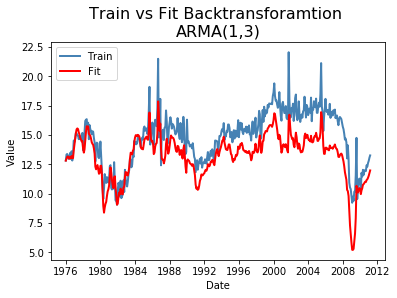

ME:
3.5124202023843605
SSE:
2263.0849332084676
MSE:
21.34985786045724
RMSE:
1.8741451924502435
Variance of Error:
9.012762182339452


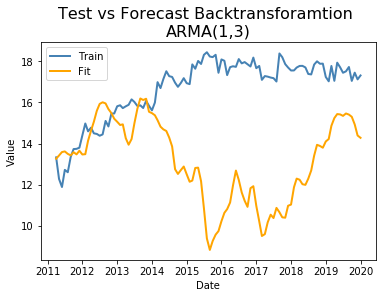

In [53]:
# all paramters passesd the CI 
mmv.backtrans(sales,yfit13,yhat13,ytrain,ytest,na13,nb13)


Predictions Based on STATS MODELS Results
                              ARMA Model Results                              
Dep. Variable:                   Diff   No. Observations:                  423
Model:                     ARMA(4, 0)   Log Likelihood                -574.514
Method:                       css-mle   S.D. of innovations              0.941
Date:                Sun, 19 Apr 2020   AIC                           1161.029
Time:                        16:24:01   BIC                           1185.313
Sample:                    01-01-1976   HQIC                          1170.624
                         - 03-01-2011                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.020      0.011      0.991      -0.040       0.040
ar.L1.Diff    -0.4777      0.048     -9.891      0.000      -0.572      -0.383
ar.L2.Dif

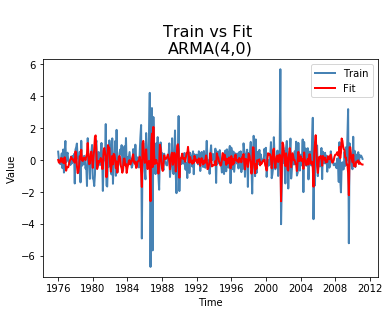

Residual Error Stats:
ME:
0.0010017617123860949
SSE:
374.2701867138336
MSE:
0.8847994957773844
RMSE:
0.03165061946291249
Variance of Error:
0.884798492250856


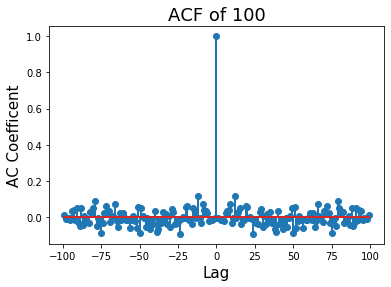

Q: 67.48941322441199  <  CHI Critcal: 489.26948763943386
Residuals are white

Forecast Errors:
ME:
0.05359114023135773
SSE:
41.04913816920648
MSE:
0.3872560204642121
RMSE:
0.23149760307907666
Variance of Error:
0.38438401015291496


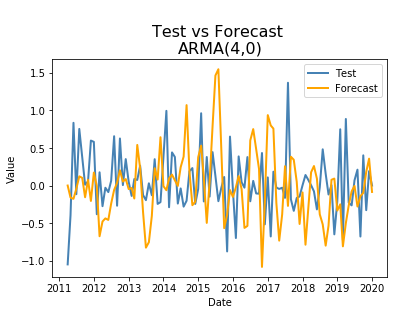


END


In [56]:
yfit40,yhat40,na40,nb40 = mmv.estARMA(sdtrain,"Diff",sdtest,4,0,0,len(sdtrain)-1,0.01)

Residual Error Stats:
ME:
-0.2130662307466267
SSE:
288.6881768623751
MSE:
0.6824779594855203
RMSE:
nan
Variance of Error:
0.6370807408009455


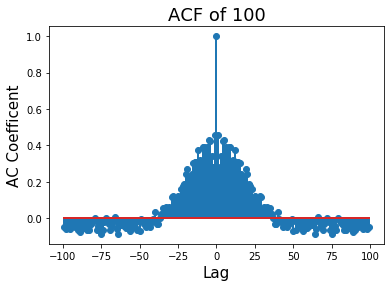

1102.4946194475442  >  603.3098821077629
Residuals are not white

Try a Different Order


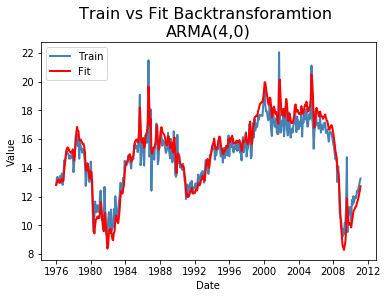

ME:
3.3824347571794413
SSE:
2362.5489098397857
MSE:
22.28819726263949
RMSE:
1.8391396785397898
Variance of Error:
10.847332376063946


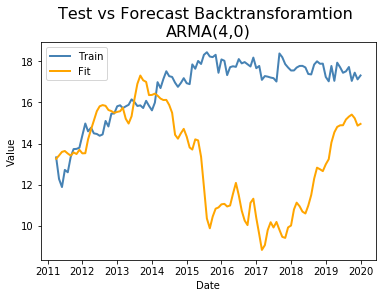

In [57]:
mmv.backtrans(sales,yfit40,yhat40,ytrain,ytest,na40,nb40)